In [143]:
import os
import re, csv, string, pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import nltk
nltk.download('punkt')
from collections import defaultdict
from numpy import loadtxt
from nltk import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.probability import FreqDist
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
tokenizer = RegexpTokenizer(r"[a-zA-Z]+")
fdist = FreqDist()

dictionary = set()
papers = {}
path = "HW1_TXT_files"
stop_words = []
all_words = []

In [3]:
for file_name in os.listdir(path):
    with open(path + os.sep + file_name, 'r', encoding = "utf8") as f:
        papers[file_name.lower()] = tokenizer.tokenize(f.read())
        for word in papers[file_name.lower()]:
            fdist[word] += 1
            all_words.append(word)
        dictionary = dictionary.union(set(papers[file_name.lower()]))

amount = sum(fdist.values())
print("Amount of words in corpus is ", amount)    
print("Initial dictionary size is ", len(dictionary))

# generate language model
for key, value in fdist.items():
    fdist[key] = value / amount

with open("stop_words_english.txt", "r", encoding = "utf8") as stop_words_file:
    stop_words = stop_words_file.read().split("\n")

Amount of words in corpus is  536960
Initial dictionary size is  26089


In [4]:
dictionary_stopwords = set()
dictionary_casefold = set()
dictionary_stemming = set()

In [5]:
#stop words removal
stopwords_filtered_list = [w for w in all_words if not w.lower() in stop_words]
dictionary_stopwords = set(stopwords_filtered_list)
# generate lang model

fdist_stopwords = FreqDist(stopwords_filtered_list)
stopwords_amount = sum(fdist_stopwords.values())
for key, value in fdist_stopwords.items():
    fdist_stopwords[key] = value / stopwords_amount

In [6]:
# case folding
casefold = [w.lower() for w in stopwords_filtered_list]
dictionary_casefold = set(casefold)

#generate lang model
fdist_casefold = FreqDist(casefold)
casefold_amount = sum(fdist_casefold.values())
for key, value in fdist_casefold.items():
    fdist_casefold[key] = value / casefold_amount

In [7]:
# stemming
stemmer = PorterStemmer()
stemming = [stemmer.stem(w) for w in casefold]
dictionary_stemming = set(stemming)

# generate stemmed lang model
fdist_stemming = FreqDist(stemming)
stemming_amount = sum(fdist_stemming.values())
for key, value in fdist_stemming.items():
    fdist_stemming[key] = value / stemming_amount

In [8]:
for title, paper in papers.items():
    stopwords_filtered_list = [w for w in paper if not w.lower() in stop_words]
    casefold = [w.lower() for w in stopwords_filtered_list]
    stemmer = PorterStemmer()
    stemming = [stemmer.stem(w) for w in casefold]
    papers[title] = stemming

In [9]:
print("initial Dictionary size is ", len(dictionary))

print("Dictionary size after stop words removal is ", len(dictionary_stopwords))

print("Dictionary size after case folding is ", len(dictionary_casefold))

print("Dictionary size after stemming is ", len(dictionary_stemming))

initial Dictionary size is  26089
Dictionary size after stop words removal is  24872
Dictionary size after case folding is  20064
Dictionary size after stemming is  14363


In [10]:
print("initial language model")
fdist.pprint()

print("\nlanguage model after stop words removal")
fdist_stopwords.pprint()

print("\nlanguage model after case folding")
fdist_casefold.pprint()

print("\nlanguage model after stemming")
fdist_stemming.pprint()

initial language model
FreqDist({'the': 0.062270932657926104, 'of': 0.03338609952324195, 'and': 0.028834550059594757, 'to': 0.021897348033373062, 'in': 0.018723927294398094, 'a': 0.017740613825983312, 'is': 0.009320992252681765, 'for': 0.009266984505363528, 'that': 0.009108685935637665, 'The': 0.007769666269368296, ...})

language model after stop words removal
FreqDist({'museum': 0.010523861221119589, 'mobile': 0.00907506230982125, 'guide': 0.008341106133121301, 'user': 0.008077340632119756, 'visitors': 0.007675958347986973, 'visitor': 0.004690438691723115, 'al': 0.003990886710805976, 'Museum': 0.003922078319240355, 'time': 0.003902964877138794, 'guides': 0.0037194758329638067, ...})

language model after case folding
FreqDist({'museum': 0.014656187403477117, 'mobile': 0.01151776021040077, 'guide': 0.009690515145491522, 'user': 0.009575834492882154, 'visitors': 0.008417559901527547, 'visitor': 0.005114757106377773, 'guides': 0.004384623618098136, 'context': 0.0042814110307497055, 'al'

# part2

In [11]:
tokenizer = RegexpTokenizer(r"[a-zA-Z]+")

rand_papers = {}
path = "HW1_rand_txt"

for file_name in os.listdir(path):
    with open(path + os.sep + file_name, 'r', encoding = "utf8") as f:
        rand_papers[file_name.lower()] = tokenizer.tokenize(f.read())
        

for title, paper in rand_papers.items():
    stopwords_filtered_list = [w for w in paper if not w.lower() in stop_words]
    casefold = [w.lower() for w in stopwords_filtered_list]
    stemmer = PorterStemmer()
    stemming = [stemmer.stem(w) for w in casefold]
    rand_papers[title] = FreqDist(stemming)
    words_amount = sum(rand_papers[title].values())
    
    for key, value in rand_papers[title].items():
        rand_papers[title][key] = value / words_amount
    

In [12]:
rel_list = ['A Framework for Guiding the Museum Tours Personalization',
            'A Multi-Sensory Approach to Cultural Heritage The Battle of Pavia Exhibition',
            'A Novel Image Based Positioning Technique Using Mobile Eye Tracker For A Museum Visit',
            'A Point-Of-Interest Directory For Mobile Tourists In Abuja, Nigeria',
            'A Survey of Map-based Mobile Guides',
            'A visitors guide in an active museum Presentation',
            'Adoption and Use of Emerging Cultural Technologies in China\'s Museums',
            'Analyzing Visitor Perceptions of Personalization in Art Museum Interactive Technology',
            'Augmented reality for visitors of cultural heritage sites',
            'Design and development of Taeneb City Guide - From Paper Maps and Guidebooks to Electronic Guides',
            'Full Access to Cultural Spaces (FACS) Mapping and evaluating museum access services using mobile eye-tracking technology',
            'In-Sights into Mobile Learning  An Exploration of Mobile Eye Tracking Methodology for  Learning in Museums',
            'Mobile augmented reality for cultural heritage Following the footsteps of Ovid among different locations in Europe',
            'Museum Guide 2.0 – An Eye-Tracking based Personal Assistant for Museums and Exhibits',
            'Potentials and Limitations of Mobile Eye Tracking in Visitor Studies_ Evidence From Field Research at Two Museum Exhibitions in Germany',
            ]

rel_list = [name.lower() + '.txt' for name in rel_list]
len(rel_list)

15

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
tokenizer = RegexpTokenizer(r"[a-zA-Z]+")

rand_papers_clas = {}
path = "HW1_rand_txt"

for file_name in os.listdir(path):
    with open(path + os.sep + file_name, 'r', encoding = "utf8") as f:
        if file_name.lower() in rel_list:
            rand_papers_clas[file_name.lower()] = (f.read(), 1)
        else:
            rand_papers_clas[file_name.lower()] = (f.read(), 0)

In [26]:
# count_vect = CountVectorizer()
# X_train_counts = count_vect.fit_transform(rand_papers_clas.values())
# X_train_counts.shape

In [27]:
# for initial language model
fdist["mobile"]+fdist["visitors"]+fdist["guide"]

#for language model after stop words removal

# for language model after case folding

# for language model after stemming

0.012224374255065555

In [28]:
rel_test = rel_list[-2:]
rel_test

['museum guide 2.0 – an eye-tracking based personal assistant for museums and exhibits.txt',
 'potentials and limitations of mobile eye tracking in visitor studies_ evidence from field research at two museum exhibitions in germany.txt']

In [29]:
train_set = rel_list[:13]
train_set

['a framework for guiding the museum tours personalization.txt',
 'a multi-sensory approach to cultural heritage the battle of pavia exhibition.txt',
 'a novel image based positioning technique using mobile eye tracker for a museum visit.txt',
 'a point-of-interest directory for mobile tourists in abuja, nigeria.txt',
 'a survey of map-based mobile guides.txt',
 'a visitors guide in an active museum presentation.txt',
 "adoption and use of emerging cultural technologies in china's museums.txt",
 'analyzing visitor perceptions of personalization in art museum interactive technology.txt',
 'augmented reality for visitors of cultural heritage sites.txt',
 'design and development of taeneb city guide - from paper maps and guidebooks to electronic guides.txt',
 'full access to cultural spaces (facs) mapping and evaluating museum access services using mobile eye-tracking technology.txt',
 'in-sights into mobile learning  an exploration of mobile eye tracking methodology for  learning in muse

In [30]:
rel_list

['a framework for guiding the museum tours personalization.txt',
 'a multi-sensory approach to cultural heritage the battle of pavia exhibition.txt',
 'a novel image based positioning technique using mobile eye tracker for a museum visit.txt',
 'a point-of-interest directory for mobile tourists in abuja, nigeria.txt',
 'a survey of map-based mobile guides.txt',
 'a visitors guide in an active museum presentation.txt',
 "adoption and use of emerging cultural technologies in china's museums.txt",
 'analyzing visitor perceptions of personalization in art museum interactive technology.txt',
 'augmented reality for visitors of cultural heritage sites.txt',
 'design and development of taeneb city guide - from paper maps and guidebooks to electronic guides.txt',
 'full access to cultural spaces (facs) mapping and evaluating museum access services using mobile eye-tracking technology.txt',
 'in-sights into mobile learning  an exploration of mobile eye tracking methodology for  learning in muse

# Train and Test split


In [229]:
X = [v[0] for k, v in rand_papers_clas.items()]
y = [v[1] for k, v in rand_papers_clas.items()]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

## Classification models

In [230]:
def elbow_met(X_train, y_train):
    distortions = []
    K = range(2,11)
    for k in K:
        knnModel = KNeighborsClassifier(n_neighbors=k)
        knnModel.fit(X_train, y_train)
        pred_k = knnModel.predict(X_test)

        distortions.append(np.mean(pred_k != y_test))
        
    # Plot the elbow
    plt.figure(figsize=(10,5))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Error Rate')
    plt.title('Error Rate vs. K Value')
    plt.show()

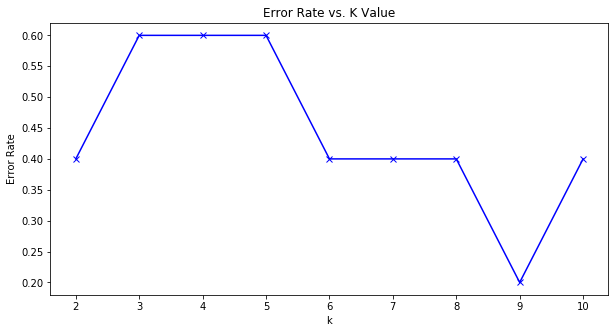

In [231]:
elbow_met(X_train, y_train)

## KNN

In [232]:
knn = KNeighborsClassifier(n_neighbors=9, metric='euclidean')
knn = knn.fit(X_train, y_train)
pred_y = knn.predict(X_test)

score = accuracy_score(pred_y, y_test)
print('Accuracy : ', score)

Accuracy :  0.8


In [233]:
##### recall
##### recision
##### f1
##### target= [0,1]

#### Cross Validation

In [234]:
cross_val_score(KNeighborsClassifier(n_neighbors=9, metric='euclidean'), X_train, y_train, cv = 10)

array([0.66666667, 0.66666667, 0.8       , 0.5       , 0.75      ,
       0.75      , 0.25      , 0.75      , 0.75      , 0.5       ])

## SVM

In [235]:
SVM = SVC(random_state = 0, gamma='auto')
SVM.fit(X_train, y_train)
pred_y = SVM.predict(X_test)
score = accuracy_score(pred_y, y_test)
print("Accuracy : ", score)

Accuracy :  0.6


In [236]:
cross_val_score(SVC(), X_train, y_train, cv = 10)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: 

array([0.66666667, 0.66666667, 0.6       , 0.75      , 0.75      ,
       0.75      , 0.75      , 0.75      , 0.75      , 0.75      ])

## Naive Bayes - Multinomial

In [237]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
pred_y = nb.predict(X_test)
score = accuracy_score(pred_y, y_test)
print("Accuracy : ", score)

Accuracy :  0.6


In [238]:
cross_val_score(MultinomialNB(), X_train, y_train, cv = 10)

array([0.66666667, 0.66666667, 0.        , 0.25      , 0.5       ,
       0.5       , 0.5       , 0.75      , 0.75      , 0.5       ])

## Random Forest

In [239]:
rfc = RandomForestClassifier(n_estimators = 300 ,random_state = 0 ,min_samples_split = 5)
rfc = rfc.fit(X_train, y_train)
pred_y = rfc.predict(X_test)
score = accuracy_score(pred_y, y_test)
print('Accuracy : ',score)

Accuracy :  0.6


In [240]:
cross_val_score(RandomForestClassifier(), X_train, y_train, cv = 10)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: Future

array([0.83333333, 0.83333333, 0.6       , 0.75      , 1.        ,
       0.75      , 0.75      , 0.75      , 0.5       , 0.75      ])

# part3

# //TODO - remember to add new new documents

In [241]:
def elbow_met(X_train):
    distortions = []
    K = range(1,10)
    for k in K:
        kmeanModel = KMeans(n_clusters=k).fit(X_train)
        kmeanModel.fit(X_train)
        distortions.append(sum(np.min(cdist(X_train, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_train.shape[0])

    # Plot the elbow
    plt.figure(figsize=(10,7))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Within groups sum of squares')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

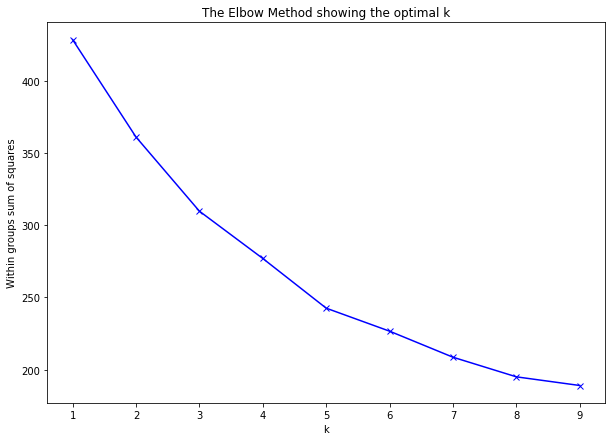

In [242]:
elbow_met(X_train)

In [244]:
kmeans = KMeans(n_clusters = 5, random_state = 0)
pred_y = kmeans.fit_predict(X_train)
pred_y

array([0, 4, 2, 2, 2, 0, 2, 0, 0, 3, 2, 2, 4, 2, 4, 2, 0, 0, 2, 0, 2, 0,
       2, 4, 4, 2, 0, 0, 2, 2, 0, 2, 0, 2, 4, 4, 0, 0, 1, 0, 0, 0, 2, 0,
       0])